## Master Sciences de l'Ingénieur, Mentions Mécanique, Robotique et Electronique

# TP1 Traitement numérique du signal : analyse d'un écoulement turbulent à partir de Transformées de Fourier Discrètes

***
## Remarques préliminaires


* il n'y a pas de compte-rendu à rendre à la fin de la séance mais vous pouvez (devez) prendre des notes,
* les fichiers nécessaires pour faire ce TP sont disponible sur Moodle,
* ce TP ne nécessite pas de connaissances approfondies de mécanique des fluides.
***

## 1 Présentation du problème
Un écoulement de couche de mélange est l'écoulement produit lorsque 2 écoulements 
de vitesses différentes se rejoignent.
C'est un écoulement de base en mécanique des fluides car il permet d'observer le développement 
spatial des tourbillons et surtout la fusion 
de ces tourbillons entre eux qui est responsable du développement spatial de la couche de mélange 
mais surtout de source de bruit dans le cas d'écoulements à haute vitesse.

Lorsque l'on effectue une mesure d'un champ de vitesse ou de la pression dans un écoulement turbulent,
 le signal de vitesse obtenu met en évidence 
des mouvements périodiques dus à la présence des mouvements tourbillonnaires 
(qui passent de façon quasi-périodique) de taille différente.
L'objectif de ce TP est d'utiliser les Transformées de Fourier Discrètes pour analyser les mouvements tourbillonnaires de cet écoulement (cf la vidéo sur Moodle). 


La figure 1 montre un champ instantané  de vorticité de cet écoulement. La vorticité correspond au rotationnel du champ de vitesse et 
permet de mettre en évidence les zones tourbillonnaires de cet écoulement. 
Sur cette figure, on peut observer qu'en amont des tourbillons de petite taille se forment.
Puis lors de leur développement spatial, ils fusionnent pour former des plus gros tourbillons et ainsi de suite.

3 sections sont ainsi retenues ($x_1$, $x_2$, et $x_3$) dans lesquelles un signal du champ de pression a été extrait en un point de l'écoulement.
Vous disposez donc de 3 signaux de pression $p_1[n]$, $p_2[n]$ et $p_3[n]$ dépendant seulement du temps. Ces données sont contenues dans les fichiers pression_x1.mat, pression_x2.mat et pression_x3.mat respectivement.

Tous ces signaux contiennent $n_t=6666$ points et leur fréquence d'échantillonnage est $f_e=1333$Hz soit une durée totale d'acquisition de $5$ s. 

<img height="100" src="vorti_instan.png" >
Figure 1 : instantané de la vorticité

## 2  Représentations temporelles et fréquentielles des signaux p1, p2 et p3

In [1]:
# On appelle les biblothèques de fonctions utiles pour la suite
# Ne pas modifier cette cellule
%matplotlib notebook
import numpy as np
import pylab as plt
from scipy.io.matlab import mio

### 1 Lecture des données

In [2]:
# Ne pas modifier cette cellule
x1 = mio.loadmat('pression_x1.mat')
p1 = np.array(x1['p1'])[0]
x2 = mio.loadmat('pression_x2.mat')
p2 = np.array(x2['p2'])[0]
x3 = mio.loadmat('pression_x3.mat')
p3 = np.array(x3['p3'])[0]
# les signaux de pression sont contenus dans les tableaux p1, p2, p3


### Créer un tableau de dimension $n_t$, noté $T$ contenant les échantillons temporels.
### Tracer le signal $p1[n] $ en fonction de $T[n]$. 

Construction de $T[n]$

In [8]:
fe=1333
nt=6666
t=np.arange(0,nt/fe,1/fe)

In [9]:
t

array([0.00000000e+00, 7.50187547e-04, 1.50037509e-03, ...,
       4.99849962e+00, 4.99924981e+00, 5.00000000e+00])

Visualisation du signal $p1[n]$

<IPython.core.display.Javascript object>


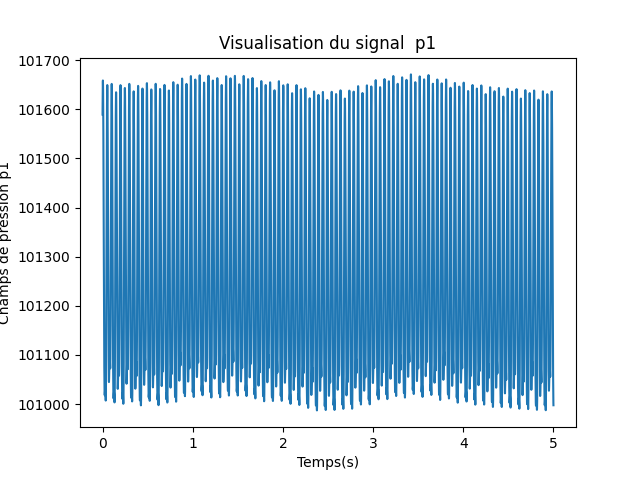

Text(0.5, 1.0, 'Visualisation du signal  p1')

In [18]:
plt.figure(1)
plt.plot(t,p1)
plt.xlabel("Temps(s)")
plt.ylabel("Champs de pression p1")
plt.title("Visualisation du signal  p1")

### 2 Quelles sont les valeurs moyennes des signaux p1[n], p2[n] et p3[n] ? A partir de ces valeurs, construire les 3 signaux de pression fluctuante à moyenne nulle. Ces signaux seront toujours utilisés par la suite et notées p1m[n], p2m[n] et p3m[n]

In [20]:
pc1=np.mean(p1)
pc2=np.mean(p2)
pc3=np.mean(p3)
pc1,pc2,pc3

(101259.83840688756, 101279.33583084871, 101280.35649424317)

In [21]:
p1m=p1-pc1
p2m=p2-pc2
p3m=p3-pc3
p1m,p2m,p3m

(array([ 329.55221811,  353.66940561,  372.60690561, ..., -249.26809439,
        -257.36184439, -262.24465689]),
 array([-257.57801835, -267.42958085, -276.08583085, ...,  135.42198165,
         154.42198165,  171.92198165]),
 array([ 98.70600576, 105.64350576, 112.15913076, ..., 366.69819326,
        359.35444326, 351.47944326]))

Mettre votre commentaire ici

### 3 Représenter sur un même graphique ces 3 signaux de pression fluctuante en fonction du temps. Limiter la durée temporelle de représentation (par exemple prendre une durée de 0,25s) pour mieux visualiser cette représentation. Qu’observez vous ?

<IPython.core.display.Javascript object>


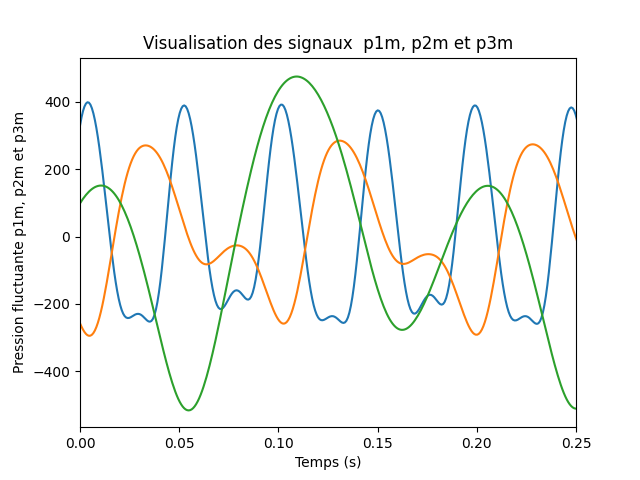

Text(0.5, 1.0, 'Visualisation des signaux  p1m, p2m et p3m')

In [23]:
#visiualisation p1m : 
plt.figure(2)
plt.plot(t,p1m,t,p2m,t,p3m)
plt.xlabel("Temps (s)")
plt.ylabel("Pression fluctuante p1m, p2m et p3m")
plt.xlim(0,0.25)
plt.title("Visualisation des signaux  p1m, p2m et p3m")

## 2.2 Représentation fréquentielle

### 4 Construire le vecteur contenant les fréquences discrètes. Comment est défini ce vecteur ?

In [28]:
f = np.fft.fftfreq(nt, 1/fe)
f

array([ 0.        ,  0.19997   ,  0.39993999, ..., -0.59990999,
       -0.39993999, -0.19997   ])

### 5 Calculer les spectres associés à ces 3 signaux de pression. On les notera p1mw[k], p2mw[k] et p3mw[k] (on pourra consulter l’aide en ligne de la fonction fft pour comprendre son utilisation). Tracer sur trois figures différentes (ou superposer sur une même figure) le module des spectres de ces signaux. On pourra limiter l’axe des fréquences à [-50 : 50]Hz. Quelles différences observez-vous entre les différents spectres ? Comment expliquez-vous ces différences ?

In [32]:
# Calcul des 3 FFT des 3 signaux de pression
p1mw = np.fft.fft(p1m)
p2mw = np.fft.fft(p2m)
p3mw = np.fft.fft(p3m)

<IPython.core.display.Javascript object>


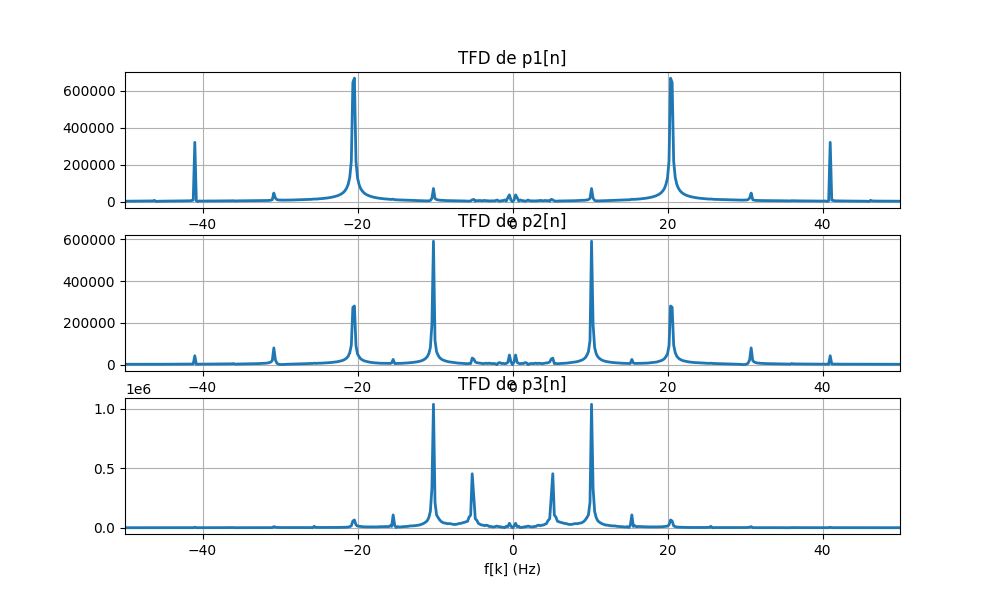

In [33]:
lim = 50 # valeur maximale en Hz pour la visualisation du spectre

plt.figure(figsize=(10,6))
# Tracé de la FFT de p1
plt.subplot(3,1,1)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p1mw)), lw=2)
plt.title('TFD de p1[n]'); plt.xlim((-lim,lim)); plt.grid()
# Tracé de la FFT de p2
plt.subplot(3,1,2)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p2mw)), lw=2)
plt.title('TFD de p2[n]'); plt.xlim((-lim,lim)); plt.grid()
# Tracé de la FFT de p3
plt.subplot(3,1,3)
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(p3mw)), lw=2)
plt.title('TFD de p3[n]'); plt.xlim((-lim,lim)); plt.grid()
plt.xlabel('f[k] (Hz)');

Mettre votre commentaire ici

## 3 Influence de la forme de la fenêtre d’analyse

### 3.1 Diminution de la durée d’analyse

En fait, les données sont issues d’une simulation numérique basée sur la résolution des équations
de Navier-Stokes. Les ressources informatiques nécessaires à cette simulation sont importantes
et le temps de simulation (très long) dépend du nombre d’échantillons final. En pratique,
on ne dispose jamais d’autant d’échantillons que les signaux p1, p2 et p3. On suppose à partir de
cette question que nt2 = 1998 points.

### 1 Construisez le signal p1mc[n] qui contient les nt2 premières valeurs de p1m[n]. Tracer ensuite sa représentation temporelle ainsi que son spectre.

<IPython.core.display.Javascript object>


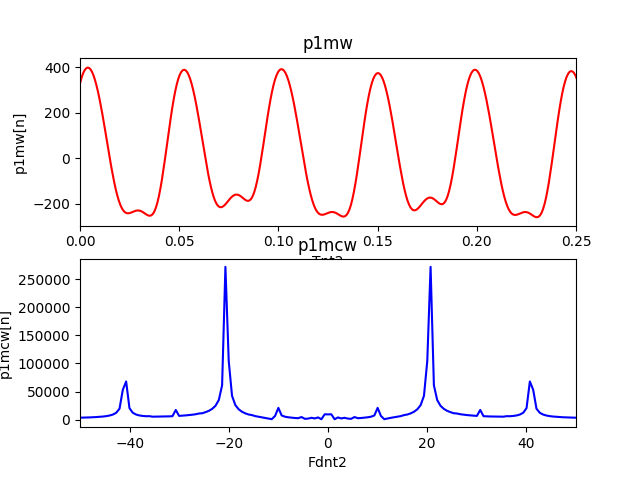

Text(0.5, 1.0, 'p1mcw')

In [51]:
p1mc = p1m[0:1998]
Tnt2 = t[0:1998]
Fdnt2 =  np.fft.fftfreq(1998, 1/fe)
Fdnt2=np.fft.fftshift(Fdnt2)
p1mcw = abs(np.fft.fftshift(np.fft.fft(p1mc)))

plt.figure(4)
plt.subplot(211)
plt.plot(Tnt2, p1mc, 'k', color = 'red')
plt.xlim(0, 0.25)
plt.title('p1mc')
plt.xlabel('Tnt2')
plt.ylabel('p1mw[n]')
plt.title('p1mw')

plt.subplot(212)
plt.plot(Fdnt2, p1mcw, 'k', color = 'blue')
plt.xlim(-50, 50)
plt.title('p1mcw')
plt.xlabel('Fdnt2')
plt.ylabel('p1mcw[n]')
plt.title('p1mcw')

### 2 Quelles différences observez-vous par rapport à la configuration précédente ?

Mettre votre commentaire ici

## 3.2 Etude de trois fenêtres différentes

Pour remédier à ce problème on se propose de changer la forme de la fenêtre d’analyse. On
va étudier l’influence de la forme à travers l’étude de trois fenêtres différentes.


In [57]:
# Ne pas modifier cette cellule
# Fenetre rectangle
def Rect(n,N):
    y = np.zeros_like(n)
    k=0
    for i in n:
        if((-N/2<=i)and(i<=N/2-1)):
            y[k]=1
        else:
            y[k]=0
        k = k + 1
    return y
# Fenetre triangle
def Triangle(n,N):
    y = np.zeros((len(n),))
    k=0
    for i in n:
        if((-N/2<=i)and(i<0)):
            y[k] = 1 + 2.0*np.float(i)/np.float(N)
        elif((i>=0) and (i<=N/2-1)):
            y[k] = 1 - 2.0*np.float(i)/np.float(N)
        else:
            y[k]=0
        k = k + 1
    return y
# Fenetre de Hann
def Hann(n,N):
    w = Rect(n,N)
    y = np.zeros((len(n),))
    k = 0
    for i in n:
        y[k] = w[k]*(0.5+0.5*np.cos(2*np.pi*np.float(i)/np.float(N)))
        k=k+1
    return y

Pour chacune de ces fenêtres, tracez la représentation temporelle pour $n \in [-100 : 100]$ et $M = 60$
et déterminer les propriétés de leurs spectres associés : la largeur du lobe principal (notée $L_\alpha$
avec $\alpha$ le type de fenêtre) et l’atténuation en dB de la hauteur du lobe secondaire par rapport
à la hauteur du lobe principal (ces notions sont illustrées sur la figure 2). Pour cela, tracez la
quantité suivante :
$$ AdB = 20 \log \left( \frac{|W_\alpha(f)|}{W_\alpha(f=0)}\right)$$AdB = 20 log
où $W_\alpha$ représente le réponse en fréquences des différentes fenêtres. Cela permet de comparer
toutes les figures avec la même référence.


<img height="50" src="Illustration_TF_fenetre.png" >



### 1. Fenêtre rectangulaire. Tracer $wR[n]$ et le module de la TFD de $wR[n]$. Déterminer la largeur du lobe principal et l’atténuation entre le lobe principal et le lobe secondaire.

<IPython.core.display.Javascript object>


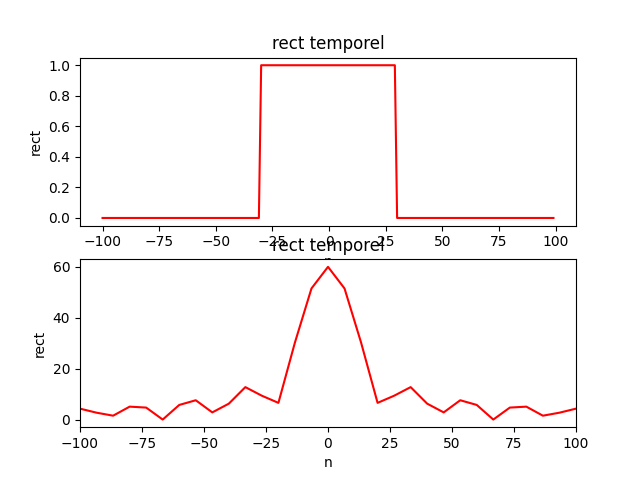

Text(0.5, 1.0, 'rect temporel')

In [68]:
n = np.arange(-100, 100, 1)
M=60
wR=Rect(n,M)
wR

f = np.fft.fftshift(np.fft.fftfreq(len(n), 1/fe))
TFRect = np.fft.fftshift(np.fft.fft(Rect(n, M)))

plt.figure(5)
plt.subplot(211)
plt.plot(n, Rect(n, M), 'k', color = 'red')
plt.title('rect')
plt.xlabel('n')
plt.ylabel('rect')
plt.title('rect temporel')
plt.subplot(212)

plt.plot(f, abs(TFRect), 'k', color = 'red')
plt.title('rect')
plt.xlabel('n')
plt.xlim(-100,100)
plt.ylabel('rect')
plt.title('rect temporel')

Mettre votre commentaire ici

### 2. Fenêtre rectangulaire. Tracer $wT[n]$ et le module de la TFD de $wT[n]$. Déterminer la largeur du lobe principal et l’atténuation entre le lobe principal et le lobe secondaire.

<IPython.core.display.Javascript object>


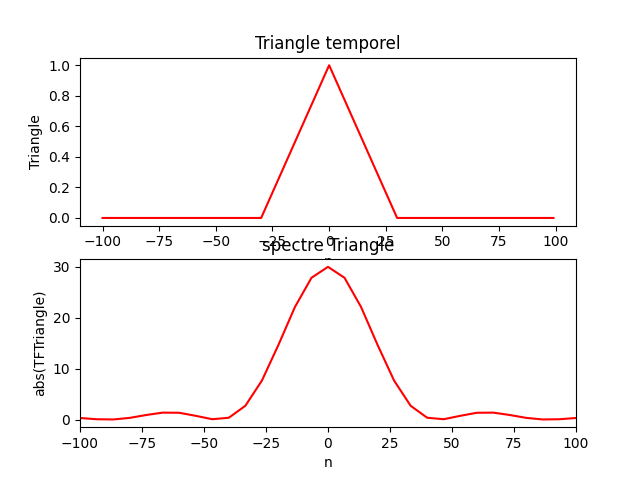

(-100.0, 100.0)

In [87]:

n = np.arange(-100, 100, 1)
M = 60

f = np.fft.fftshift(np.fft.fftfreq(len(n), 1/fe))
TFTriangle = np.fft.fftshift(np.fft.fft(Triangle(n, M)))

plt.figure(7)
plt.subplot(211)
plt.plot(n, Triangle(n, M), 'k', color = 'red')
plt.title('Triangle')
plt.xlabel('n')
plt.ylabel('Triangle')
plt.title('Triangle temporel')

plt.subplot(212)
plt.plot(f, abs(TFTriangle), 'k', color = 'red')
plt.title('TFTriangle')
plt.xlabel('n')
plt.ylabel('abs(TFTriangle)')
plt.title('spectre Triangle')
plt.xlim(-100,100)


Mettre votre commentaire ici

### 3. Fenêtre de Hann. Tracer $wH[n]$ et le module de la TFD de $wH[n]$. Déterminer la largeur du lobe principal et l’atténuation entre le lobe principal et le lobe secondaire.

<IPython.core.display.Javascript object>


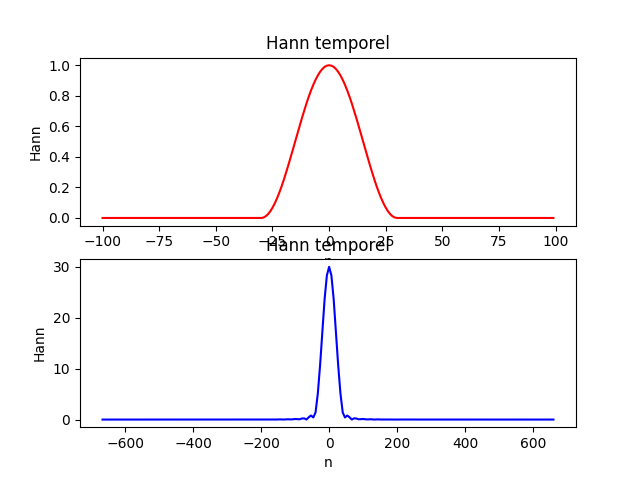

Text(0.5, 1.0, 'Hann temporel')

In [86]:
n = np.arange(-100, 100, 1)
M=60
f = np.fft.fftshift(np.fft.fftfreq(len(n), 1/fe))
TFHann = np.fft.fftshift(np.fft.fft(Hann(n, M)))

plt.figure(8)
plt.subplot(211)
plt.plot(n, Hann(n, M), 'k', color = 'red')
plt.title('Hann')
plt.xlabel('n')
plt.ylabel('Hann')
plt.title('Hann temporel')
plt.subplot(212)

plt.plot(f, abs(TFHann), 'k', color = 'blue')
plt.title('Hann')
plt.xlabel('n')
plt.ylabel('Hann')
plt.title('Hann temporel')

Mettre votre commentaire ici

### Application des fenêtres triangulaires et de Hann à l’analyse des signaux de couche de mélange

Mettre votre commentaire ici